## Integrantes

18130122 Cielo Luz Elena Llamas Servin

18130141 Cristyaquelin Dominguez Felix

18130159 Yañez Gonzalez Christian Emmanuel

##### Copyright 2018 The TensorFlow Authors.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [3]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Text classification with movie reviews

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/basic_text_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/r2.0rc/site/en/tutorials/keras/basic_text_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/r2.0rc/site/en/tutorials/keras/basic_text_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

En este cuaderno se clasifican las evaluaciones de usuarios a películas como *positivas* o *negativas*. Este es un ejeplo de una clasificación *binaria* o de dos clases, un problema ampliamente aplicable en el aprendizaje automático.

Se usará el conjunto de datos de [IMDB](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb) que contiene el texto de 50,000 evaluaciones de películas de la Internet Movie DataBase (IMBD). Este conjunto se divide en 25,000 evaluaciones para el entrenamiento y 25,000 para la prueba. Los conjuntos de entrenamiento y prueba estan *balanceados*, lo que significa que ambos contienen la misma cantidad de evaluaciones positivas y negativas.

Este cuaderno usa [tf.keras](https://www.tensorflow.org/guide/keras), una API de alto nivel para entrenar modelos en TensorFlow. Para un tutorial más avanzado en clasificación de texto usando `tf.keras`, ve a [MLCC Text Classification Guide](https://developers.google.com/machine-learning/guides/text-classification/).

In [4]:
# keras.datasets.imdb is broken in 1.13 and 1.14, by np 1.16.3
# pip install tf_nightly

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.10.0


## Descargar el conjunto de datos IMDB

El conjunto de datos IMDB viene incluido con TensorFlow. Ya ha sido preprocesado de tal forma que las evaluaciones (secuencias de palabras) se han convertido a secuencias de enteros, donde cada entero representa una palabra específica en un diccionario.

El siguiente código descarga el conjunto de datos IMDB a tu máquina (o usa una copia del caché si ya lo descargaste):

In [6]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


El argumento `num_words=10000` mantiene las 10,000 palabras más frecuentes que ocurren en el conjunto de datos de entrenamiento. Las palabras raras se descartan para mantener manejabla el tamaño de los datos.

## Exploración de los datos

Nos tomaremos un momento para entender el formato de los datos. el conjunto de datos esta preprocesado: cada ejemplo en el arreglo de enteros representa a las palabras de la evaluación de las películas. Cada etiqueta es un valor entero ya se de 0 o 1, donde 0 es una evaluación negativa y 1 es una evaluación positiva.

In [7]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


El texto de las evaluaciones se ha convertido a enteros, donde cada entero representa una palabra específica en un diccionario. Así es como se ve la primera evaluación:

In [8]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Las evaluaciones de las películas pueden tener distinta cantidad de palabras. En el código de abajo se muestra el número de palabras en la primera y segunda evaluación. 
Ya que las entradas a las redes neuronales deben tener el mismo tamaño, tendremos que resolver esto.

In [9]:
len(train_data[0]), len(train_data[1])

(218, 189)

### Convertir los enteros de nuevo a palabras

Puede ser útil convertir los enteros nuevamente a texto. En el siguiente código creamos una función de ayuda para buscar las palabras en un diccionario que contiene los enteros para mapearlos al texto.


In [10]:
# Un diccionario que mapea las palabras a un índice entero
word_index = imdb.get_word_index()

# Los primeros índices están reservados
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1641221/1641221 [==============================] - 1s 0us/step


Ahora podemos usar la función `decode_review` para desplegar el texto para la primera evaluación:

In [11]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

## Preparar los datos

Los arreglos con las evaluaciones que contienen los enteros deben de convertirse a tensores antes de usarse para introducirse a las redes neuronales. Esta conversión se puede hacer de dos formas:

* Convertir los arreglos en vectores con 0s y 1s que indican que palabras de un diccionario ocurren en una evaluación, similar a lo que se conoce como one-hot enoding. Por ejemplo, la secuencia [3, 5] se convertería un vector con 10,000 elementos que estaría lleno de ceros, excepto en los índices 3 y 5 que se refiere a las palabras que ocurren. Entonces, esto sería la primera capa de la red neuronal. Esta forma requiere bastante memoria, ya que requiere una matriz de `num_words * num_reviews`.

* Alternativamente, podemos hacer padding (o rellenar) los arreglos de forma que todos tengan la misma longitud, después crear un tensor de enteros con una forma `max_length * num_reviews`. Podemos usar una capa embebida capaz de manejar esta forma como la primer capa de la red.

En este tutorial, usaremos la segunda forma.


Ya que las evaluaciones de las películas deben tener la misma longitud, usaremos la función [pad_sequences](https://keras.io/preprocessing/sequence/#pad_sequences) para estandarizar las longitudes:

In [12]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

Vamos a ver la longitud de los ejemplos ahora:

In [13]:
len(train_data[0]), len(train_data[1])

(256, 256)

E inspeccionar la primera evaluación (ahora rellenada):

In [14]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

## Construir el modelo

La red neuronal se crea al apilar capas, lo que requiero dos decisiones de arquitectura principales:

* ¿Cuántas capas se usarán en el modelo?
* ¿Cuántas *hidden units* (unidades ocultas) se usarán en cada capa?

En este ejemplo, los datos de entrada consisten en un arreglo con índices de palabras. Las etiquetas para la predicción son ya sea 0 o 1. Vamos a construir un modelo para este problema:

In [15]:
# la forma de la entrada es el contador del vocabulario usado para las evaluaciones de las pelícuas (10,000 palabras)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


Las capas estan apiladas de forma secuencial para construir al clasificador:

1. La primera capa es una capa `Embebida`. Esta capa toma el vocabulario de enteros codificados y busca el vector embebido para cada indice de palabra. Estos datos se aprende conforme el modelo se entrena. Los vector agregan una dimensión al arreglo de salida. La dimensión resultante es:>

1. The layers are stacked sequentially to build the classifier:`(batch, sequence, embedding)`.
2. A una capa llamada `GlobalAveragePooling1D`  regresa un vector de salida con un tamaño fijo para caad ejemplo, promediando sobre la dimensión de la secuencia. Esto permite al modelo la capacidad de manipular la longitud de la variable de entrada, de la manera más fácil posible.
3. Este vector de tamaño fijo se conduce a través de una capa completamente conectada (`Dense`) con 16 unidades escondidas.
4. La última capa es una capa densamiente conectada con solo un nodo de salida. Por medio de la función de activación `sigmoid`, este valor fluctúa entre 0 y 1, representando una probabilidad o nivel de confianza.

### Unidades ocultas

El modelo tiene dos capas intermedias "ocultas", entre las capas de entrada y de salida. el número de salidas (unidades, nodos, o neuronas) es la dimensión del espacio de representación para cada capa. En otras palabras, la cantidad de libertad de la red esta permitida cuando se aprende una representación interna.

Si un modelo tiene más unidades ocultas (un espacio de representación de dimensión mas alta), u otro con mas capas. entonces la red puede aprender representaciones más complejas. Sin emabrgo, esto provoca que la red requiere más recursos computacionales y podría llegar a aprender patrones no deseados que mejoran el desempeño en los datos de entrenamiento pero no en los datos de prueba, a esto se le conoce como *overfitting* y se verá mas adelante.

### Optimizador y función de pérdida

Un modelo necesita una función de pérdida y un optimizador para el entrenamiento. Ya que es un problema de clasificación binaria, y el modelo entrega una probabilidad como salida (una capa con un solo nodo con una función de activación sigmoide(, usaremos la función de pérdida `binary_crossentropy`.

Este no es la única decisión respecto a la función de pérdida, se puede, por ejemplo, escoger `mean_squared_error`. Pero, generalmente la `binary_crossentropy` es mejor para tratar con probabilidades, ya que mide la "distancia"entre las distribuciones de probabilidad, o en nuestro caso, entre la distribución de nuestro "ground-truth" y las predicciones.

Ahora, configuramos el modelo para usar un optimizador y una función de pérdida:

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

## Creación de un conjunto de validación

Cuando entrenamos, queremos checar la exactitud del modelo en datos que no ha visto nunca. Creamos un *conjunto de validación* al separar 10,000 ejemplos del conjunto de datos de entrenamiento original. (Porqué no solo usar el conjunto de prueba de una vez? Nuestra meta es desarrollar y ajustar nuestro modelos usando únicamente datos de entrenamiento, y después usar datos de prueba solo una vez para evaluar nuestra exactitud)


In [17]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## Entrenamiento del modelo

Entrar el modelo por 40 époas en mini-lotes de 512 ejemplos. Esto es, 40 iteraciones sobre todas las muestras de tensores `x_train` y `y_train`. Mientras se entrena, se monitorea la pérdida y exactitud en las 10,000 muestras del conjunto de validación.

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 22ms/step - loss: 0.6922 - acc: 0.5983 - val_loss: 0.6908 - val_acc: 0.7089
Epoch 2/40
30/30 [==============================] - 1s 17ms/step - loss: 0.6880 - acc: 0.7219 - val_loss: 0.6848 - val_acc: 0.7328
Epoch 3/40
30/30 [==============================] - 1s 17ms/step - loss: 0.6788 - acc: 0.7455 - val_loss: 0.6730 - val_acc: 0.7364
Epoch 4/40
30/30 [==============================] - 0s 17ms/step - loss: 0.6622 - acc: 0.7617 - val_loss: 0.6539 - val_acc: 0.7566
Epoch 5/40
30/30 [==============================] - 0s 15ms/step - loss: 0.6374 - acc: 0.7749 - val_loss: 0.6274 - val_acc: 0.7675
Epoch 6/40
30/30 [==============================] - 0s 16ms/step - loss: 0.6053 - acc: 0.7943 - val_loss: 0.5951 - val_acc: 0.7730
Epoch 7/40
30/30 [==============================] - 0s 16ms/step - loss: 0.5675 - acc: 0.8147 - val_loss: 0.5590 - val_acc: 0.8016
Epoch 8/40
30/30 [==============================] - 0s 15ms/step - loss: 0.5268 - a

## Evaluar el modelo

Veamos como se desempeña el modelo. Se regresan dos valores. La pérdida (un número que representa nuestro error, valores más bajos son mejores), y exactitud.

In [19]:
results = model.evaluate(test_data, test_labels)

print(results)

782/782 [==============================] - 1s 1ms/step - loss: 0.3113 - acc: 0.8749
[0.3113243281841278, 0.8748800158500671]


Esta propuesta, que es algo ingenua, logra una exactitud de 87%. Con propuestas de arquitecturas más avanzadas, el modelo puede incrementar a cerca de 95%.

## Crear un gráfica de exactitud y pérdida a través del tiempo

`model.fit()` regresa un objeto `History` que contiene un diccionario con todo lo que sucedió durante el entrenamiento:

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Hay cuantro entradas: una para cada medida monitoreada durante el entrenamiento y validación. Esamos estos valores para graficar y comparar la pérdida y exactitud en el entrenamiento y validación:

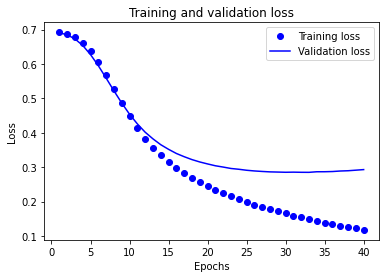

In [21]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

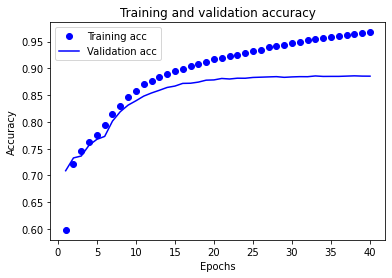

In [22]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

En esta gráfica, los puntos representan la pérdida y la exactitud en el entrenamiento mientras que la linea sólida representa la pérdida y exactitud en la validación.

Nota que la pérdida *disminuye* en cada época durante el entrenamiento y la exactitud *incremementa* con cada época. Esto es esperado la que cuando se usa el algoritmo de optimización del descenso del grandiente se debe minimizar la cantidad deseada sobre cada iteración.

Esto no es el caso para la périda y la exactitud en la validación, ya que se ven que llegan a un pico en las 20 épocas. Este es un ejemplo de *overfitting*: el modelo funciona mejor en los datos de entremaiento que en datos que no ha visto nunca. Después de este punto, el modelo sobre-optimiza y encuentra representaciones *específicas* para los datos de entrenamiento que no *generalizan* a los datos de prueba.

Para este caso particular, podemos prevenir el *overfitting* al parar el entrenamiento después de las 20 épocas.

## Predecir una evaluación

In [23]:
results = model.predict(test_data[[1]])
print("Probability: ", results)
print("Label predicted: ",test_labels[1])
print("Evaluación:")
decode_review(test_data[1])

1/1 [==============================] - 0s 85ms/step
Probability:  [[0.9995918]]
Label predicted:  1
Evaluación:


"a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances <UNK> the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere <UNK> with sexual tension and psychological <UNK> it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the <UNK> moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual <UNK> and desperation be patient <UNK> up the atmosphere and pay atte

Mostrar palabras del diccionario

In [24]:
print(list(word_index.keys())[0:10])  

['fawn', 'tsukino', 'nunnery', 'sonja', 'vani', 'woods', 'spiders', 'hanging', 'woody', 'trawling']
